In [1]:
import json

cis_filter = False

if cis_filter:
  f = open('rankings_cis_actors.json', 'r')
else:
  f = open('rankings_actors.json', 'r')

original_data = json.load(f)
f.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [3]:
print(original_data)

[{'strat': 'Governments', 'mu': 3.9856940949179642, 'sigma': 0.7820039157470787}, {'strat': 'Researchers and companies', 'mu': 3.057903834351394, 'sigma': 0.7804346050168929}, {'strat': 'People', 'mu': 2.5651698346657708, 'sigma': 0.7823522713771596}]


In [4]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
    
df = pd.DataFrame(data, columns=['Actor', 'Value'])
print(df)

                  Actor     Value
0       01. Governments  3.243109
1       01. Governments  3.858800
2       01. Governments  4.673523
3       01. Governments  4.676657
4       01. Governments  3.477060
5       01. Governments  3.884129
6       01. Governments  5.316878
7       01. Governments  4.772714
8       01. Governments  2.780287
9       01. Governments  3.173761
10      01. Governments  4.118329
11      01. Governments  4.528842
12      01. Governments  3.034660
13      01. Governments  3.574974
14      01. Governments  4.366171
15      01. Governments  3.284431
16      01. Governments  4.819262
17      01. Governments  3.165791
18      01. Governments  5.595862
19      01. Governments  2.799828
20      01. Governments  3.582005
21      01. Governments  4.886545
22      01. Governments  3.364893
23      01. Governments  4.733762
24      01. Governments  2.271059
25      01. Governments  2.865996
26      01. Governments  3.963776
27      01. Governments  3.528975
28      01. Go

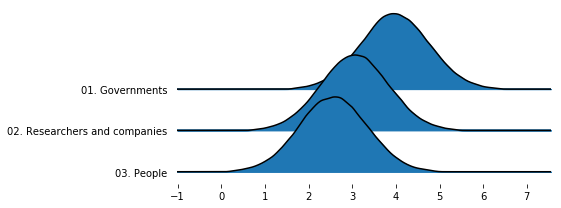

In [6]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Actor",figsize=(8,3))